In [158]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from pathlib import Path
pd.set_option('display.max_rows', 100)


In [159]:
dialogpath = Path('/Users/michelleschlacks/Desktop/movie_dialogue.tsv')
chars = pd.read_csv(dialogpath, sep = '\t')
chars = chars.sample(frac = 1.0)
                  
chars.head()

,mid,cid,cname,mname,gender,wordcount,year,genres,comedy,thriller,drama,romance,lines
2675,m595,u8770,BOYD,very bad things,m,2298,1998,"['comedy', 'crime', 'thriller']",True,True,False,False,All right. Let's all go back in. Adam? You're ...
587,m202,u3091,SUE,swingers,m,484,1996,"['comedy', 'drama']",True,False,True,False,"Good for you, man. He's being smart. / Thanks,..."
1767,m424,u6367,HARRY,lord of illusions,m,1282,1995,"['fantasy', 'horror', 'mystery', 'thriller']",False,True,False,False,"You bet. / Hello, L.A. / Tell him he can keep ..."
460,m181,u2784,VIKTOR,simone,M,2798,2010,"['short', 'drama', 'horror', 'thriller']",False,True,True,False,No!! I can prove it to you. I'll take you to...
2128,m493,u7307,ROMEO,romeo and juliet,m,1423,1968,"['drama', 'romance']",False,False,True,True,Tempt not a desperate man! / Live and be prosp...


In [160]:
chars = chars.loc[~pd.isnull(chars['lines']), : ]
chars = chars.reset_index(drop = True)  # try commenting this line out, and see how it
                                          # makes your task more difficult
chars.shape

(2969, 13)

In [276]:
keepers = [] #all of the characters that have action or comedy in their genre
both = []    #characters that have both comedy and action 
indeces = [] #zero = comedy, one = action movie
for idx, row in chars.iterrows():
    if 'action' in row.genres and 'comedy' in row.genres:
        both.append(idx)
        indeces.append(2)
    if 'action' in row.genres or 'comedy' in row.genres:
        keepers.append(idx)
        if 'action' in row.genres:
            indeces.append(1)
        else:
            indeces.append(0)

            
            
#print(indeces)
old = []
new = []

sum_of_action = 0
sum_of_comedy = 0
sum_of_both = 0
for i in indeces:
    if i == 0:
        sum_of_comedy += 1
    if i == 1:
        sum_of_action += 1
    if i == 2:
        sum_of_both += 1 
        
print("sum of action characters", sum_of_action)
print("sum of comedy characters", sum_of_comedy)
print("sum of other characters", sum_of_both)

    
    
    


sum of action characters 644
sum of comedy characters 756
sum of other characters 102


,0,genrelabel
0,comedy,comedy
1,comedy,comedy
2,other,other
3,other,other
4,other,other
...,...,...
2964,action,action
2965,comedy,comedy
2966,comedy,comedy
2967,other,other


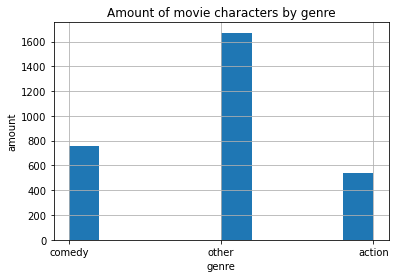

In [261]:
mylistvariablename = list()        #the number that represents what genre the characters are. 
                                   #action = 0, comedy = 1, both or neither = 3

for idx, row in chars.iterrows():
    if 'action' in row.genres and 'comedy' in row.genres:
        mylistvariablename.append(3)
    elif 'action' in row.genres:
        mylistvariablename.append(0)
    elif 'comedy' in row.genres:
        mylistvariablename.append(1)
    else:
        mylistvariablename.append(3)
plot = []
for i in mylistvariablename:
    if i == 1:
        plot.append("comedy")
    elif i == 0:
        plot.append("action")
    elif i == 3:
        plot.append("other")
newdf = pd.DataFrame(plot)       

chars['genrelabel'] = mylistvariablename
newdf['genrelabel'] = plot
newdf['genrelabel'].hist()
plt.title('Amount of movie characters by genre')
plt.xlabel('genre')
plt.ylabel('amount')
newdf

In [258]:
df_data_without_3 = chars[((chars["genrelabel"] == 0) | (chars["genrelabel"] == 1)) & (chars["genrelabel"] != 3)]


In [259]:
newdf_w3 = newdf[((newdf["genrelabel"] == 'action') | (newdf["genrelabel"] == 'comedy')) & (newdf["genrelabel"] != 'other')]


Text(0, 0.5, 'amount')

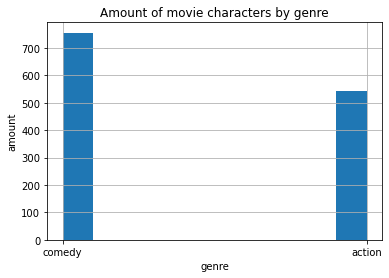

In [264]:
newdf_w3["genrelabel"].hist()
plt.title('Amount of movie characters by genre')
plt.xlabel('genre')
plt.ylabel('amount')

In [267]:
df_date_before2000 = df_data_without_3[df_data_without_3["year"] <= 2000]
df_data_after2000 = df_data_without_3[df_data_without_3["year"] > 2000]
#df_date_before2000.isnull().sum().sum()
#print(df_date_before2000)

In [174]:
df_date_before2000 = df_date_before2000.sample(frac=1) #randomizing data
print(len(df_date_before2000))

1052


<AxesSubplot:>

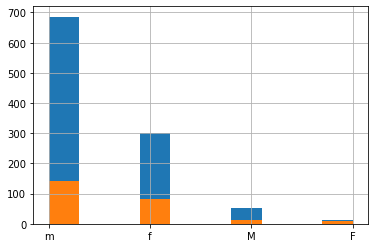

In [275]:
df_date_before2000["gender"].hist()
df_data_after2000["gender"].hist()

<AxesSubplot:>

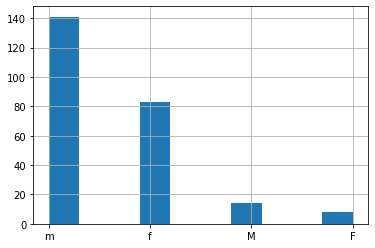

In [273]:
df_data_after2000["gender"].hist()

In [179]:
trainpre2000 = df_date_before2000[0:800]
testpre2000 = df_date_before2000[800:]
#print(trainpre2000)
#print(testpre2000)

Vectorize for trainpre2000

In [195]:
vectorizer = CountVectorizer(max_features = 4000)
sparse_wordcounts = vectorizer.fit_transform(trainpre2000.lines)
wordcounts = sparse_wordcounts.toarray()
charwords_b2000 = pd.DataFrame(wordcounts, columns = vectorizer.get_feature_names())
charwords_b2000.head()

,000,10,100,11,12,14,15,18,20,30,...,yourself,yourselves,youth,yuh,yup,zander,zavitz,zero,zone,zuul
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,9,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,6,0,0,0,0,0,0,0,0,0


Vectorize for testpre2000

In [196]:
vectorizer = CountVectorizer(max_features = 4000)
sparse_wordcounts = vectorizer.fit_transform(testpre2000.lines)
wordcounts = sparse_wordcounts.toarray()
charwords_tb2000 = pd.DataFrame(wordcounts, columns = vectorizer.get_feature_names())
charwords_tb2000.head()

,000,10,100,11,12,14,17,20,22,24,...,yours,yourself,yourselves,youth,yuh,yum,yup,zaltar,zero,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Vectorize testpost2000 i.e. df_data_after2000

In [194]:
vectorizer = CountVectorizer(max_features = 4000)
sparse_wordcounts = vectorizer.fit_transform(df_data_after2000.lines)
wordcounts = sparse_wordcounts.toarray()
charwords_a2000 = pd.DataFrame(wordcounts, columns = vectorizer.get_feature_names())
charwords_a2000.head()
#charwords.isnull().sum().sum()


,000,100,12,200,24,25,30,45,50,500,...,yourself,youth,yu,yup,zaius,zee,zero,zhdanov,zira,zone
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [214]:
trainfreqsp2000 = df_date_before2000["genrelabel"].iloc[0:800]
train_yp2000 = df_date_before2000["genrelabel"].iloc[0:800]
train_yp2000


249     0
194     0
853     0
2393    0
281     1
       ..
2677    0
723     0
1851    1
1821    0
982     1
Name: genrelabel, Length: 800, dtype: int64

In [215]:
testfreqsp2000 = df_date_before2000["genrelabel"].iloc[800:]
test_yp2000 = df_date_before2000["genrelabel"].iloc[800:]
test_yp2000

1410    1
2000    1
2239    0
2178    0
229     1
       ..
1280    1
2963    0
952     1
323     1
2328    1
Name: genrelabel, Length: 252, dtype: int64

In [217]:
testfreqsa2000 = df_data_after2000["genrelabel"]
test_ya2000 = df_data_after2000["genrelabel"]
test_ya2000

11      1
23      0
33      0
35      1
58      0
       ..
2908    0
2926    0
2933    0
2946    0
2968    0
Name: genrelabel, Length: 246, dtype: int64

Train on trainpre2000

In [239]:
trainscaler = StandardScaler()
trainXscaled = trainscaler.fit_transform(charwords_b2000)
trainXscaled = pd.DataFrame(trainXscaled, columns = charwords_b2000.columns)
trainXscaled.head()
#trainXscaled.plot()

,000,10,100,11,12,14,15,18,20,30,...,yourself,yourselves,youth,yuh,yup,zander,zavitz,zero,zone,zuul
0,-0.135579,-0.144368,-0.129701,-0.125988,-0.147348,-0.069605,-0.108497,-0.086929,-0.134597,-0.164689,...,-0.536453,-0.082437,-0.102598,-0.069605,-0.116248,-0.039073,-0.039498,-0.139218,-0.070264,-0.047488
1,-0.135579,-0.144368,-0.129701,-0.125988,-0.147348,-0.069605,-0.108497,-0.086929,-0.134597,-0.164689,...,-0.536453,-0.082437,-0.102598,-0.069605,-0.116248,-0.039073,-0.039498,-0.139218,-0.070264,-0.047488
2,-0.135579,-0.144368,-0.129701,-0.125988,-0.147348,-0.069605,-0.108497,-0.086929,-0.134597,-0.164689,...,-0.536453,-0.082437,-0.102598,-0.069605,-0.116248,28.093655,-0.039498,-0.139218,-0.070264,-0.047488
3,-0.135579,-0.144368,-0.129701,-0.125988,-0.147348,-0.069605,-0.108497,-0.086929,-0.134597,-0.164689,...,-0.536453,-0.082437,-0.102598,-0.069605,-0.116248,-0.039073,-0.039498,-0.139218,-0.070264,-0.047488
4,-0.135579,-0.144368,-0.129701,-0.125988,-0.147348,-0.069605,-0.108497,-0.086929,-0.134597,-0.164689,...,5.653391,-0.082437,-0.102598,-0.069605,-0.116248,-0.039073,-0.039498,-0.139218,-0.070264,-0.047488


Test on testpre2000

In [220]:
testscalerpre2000 = StandardScaler()
testXscaledpre2000 = testscalerpre2000.fit_transform(charwords_tb2000)
testXscaledpre2000 = pd.DataFrame(testXscaledpre2000, columns = charwords_tb2000.columns)
testXscaledpre2000.head()

,000,10,100,11,12,14,17,20,22,24,...,yours,yourself,yourselves,youth,yuh,yum,yup,zaltar,zero,zone
0,-0.145521,-0.181849,-0.142278,-0.067196,-0.127,-0.142278,-0.103418,-0.156174,-0.105574,-0.127,...,-0.393438,-0.611583,-0.127,-0.127,-0.067561,-0.076615,-0.1146,-0.063119,-0.173303,-0.13484
1,-0.145521,-0.181849,-0.142278,-0.067196,-0.127,-0.142278,-0.103418,-0.156174,-0.105574,-0.127,...,-0.393438,2.891121,-0.127,-0.127,-0.067561,-0.076615,-0.1146,-0.063119,-0.173303,-0.13484
2,-0.145521,-0.181849,-0.142278,-0.067196,-0.127,-0.142278,-0.103418,-0.156174,-0.105574,-0.127,...,-0.393438,0.555985,-0.127,-0.127,-0.067561,-0.076615,-0.1146,-0.063119,-0.173303,-0.13484
3,-0.145521,-0.181849,-0.142278,-0.067196,-0.127,-0.142278,-0.103418,-0.156174,-0.105574,-0.127,...,1.550610,-0.611583,-0.127,-0.127,-0.067561,-0.076615,-0.1146,-0.063119,-0.173303,-0.13484
4,-0.145521,-0.181849,-0.142278,-0.067196,-0.127,-0.142278,-0.103418,-0.156174,-0.105574,-0.127,...,-0.393438,0.555985,-0.127,-0.127,-0.067561,-0.076615,-0.1146,-0.063119,-0.173303,-0.13484


Test on testpost2000

In [221]:
testscalerpost2000 = StandardScaler()
testXscaledpost2000 = testscalerpost2000.fit_transform(charwords_a2000)
testXscaledpost2000 = pd.DataFrame(testXscaledpost2000, columns = charwords_a2000.columns)
testXscaledpost2000.head()

,000,100,12,200,24,25,30,45,50,500,...,yourself,youth,yu,yup,zaius,zee,zero,zhdanov,zira,zone
0,-0.161203,-0.085855,-0.111111,-0.111111,-0.128565,-0.111111,-0.136505,-0.104685,-0.085855,-0.121375,...,1.043958,-0.128565,-0.089978,-0.111111,-0.085855,-0.09353,-0.163436,-0.090536,-0.106868,-0.141069
1,-0.161203,-0.085855,-0.111111,-0.111111,-0.128565,-0.111111,-0.136505,-0.104685,-0.085855,-0.121375,...,-0.431983,-0.128565,-0.089978,-0.111111,-0.085855,-0.09353,-0.163436,-0.090536,-0.106868,-0.141069
2,-0.161203,-0.085855,-0.111111,-0.111111,-0.128565,-0.111111,-0.136505,-0.104685,-0.085855,-0.121375,...,-0.431983,-0.128565,-0.089978,-0.111111,-0.085855,-0.09353,-0.163436,-0.090536,-0.106868,-0.141069
3,-0.161203,13.994295,-0.111111,-0.111111,-0.128565,-0.111111,-0.136505,-0.104685,-0.085855,-0.121375,...,1.043958,-0.128565,-0.089978,-0.111111,-0.085855,-0.09353,-0.163436,-0.090536,-0.106868,-0.141069
4,-0.161203,-0.085855,-0.111111,-0.111111,-0.128565,-0.111111,-0.136505,-0.104685,-0.085855,-0.121375,...,-0.431983,-0.128565,-0.089978,4.444444,-0.085855,-0.09353,-0.163436,-0.090536,-0.106868,-0.141069


## Prediction

In [225]:
logist = LogisticRegression(C = .1, max_iter = 1000) 
logist.fit(trainXscaled, train_yp2000)

predictionsb2000 = logist.predict(testXscaledpre2000)
sum(predictionsb2000 == test_yp2000) / len(predictionsb2000)

0.5873015873015873

In [226]:
logist = LogisticRegression(C = .1, max_iter = 1000) 
logist.fit(trainXscaled, train_yp2000)

predictionsa2000 = logist.predict(testXscaledpost2000)
sum(predictionsa2000 == test_ya2000) / len(predictionsa2000)

0.5650406504065041

In [227]:
f1_score(test_yp2000, predictionsb2000)

0.7028571428571428

In [228]:
f1_score(test_ya2000, predictionsa2000)

0.65814696485623

In [229]:
tp = sum((test_yp2000 == 1) & (predictionsb2000 == 1)) #before 2000
fp = sum((test_yp2000 == 0) & (predictionsb2000 == 1))
fn = sum((test_yp2000 == 1) & (predictionsb2000 == 0))

precision = tp / (tp + fp)
recall = tp / (tp + fn)

F1 = 2 * (precision * recall) / (precision + recall)

print(round(precision, 4), round(recall, 4), round(F1, 4))

0.6119 0.8255 0.7029


In [230]:
tpa = sum((test_ya2000 == 1) & (predictionsa2000 == 1))   #after 2000
fpa = sum((test_ya2000 == 0) & (predictionsa2000 == 1))
fna = sum((test_ya2000 == 1) & (predictionsa2000 == 0))

precisiona = tpa / (tpa + fpa)
recalla = tpa / (tpa + fna)

F1a = 2 * (precisiona * recalla) / (precisiona + recalla)

print(round(precisiona, 4), round(recalla, 4), round(F1a, 4))

0.545 0.8306 0.6581


In [231]:
logist = LogisticRegression(C = .1, max_iter = 1000, class_weight = 'balanced') 
logist.fit(trainXscaled, train_yp2000)

predictions = logist.predict(testXscaledpre2000)

tp = sum((test_yp2000 == 1) & (predictionsb2000 == 1)) #before 2000
fp = sum((test_yp2000 == 0) & (predictionsb2000 == 1))
fn = sum((test_yp2000 == 1) & (predictionsb2000 == 0))

precision = tp / (tp + fp)
recall = tp / (tp + fn)

F1 = 2 * (precision * recall) / (precision + recall)

print(round(precision, 4), round(recall, 4), round(F1, 4))

0.6119 0.8255 0.7029


In [232]:
for c_param in [.00001, .0001, .001, .01, .1, 1, 10]:
    logist = LogisticRegression(C = c_param, max_iter = 1000, class_weight = 'balanced') 
    results = cross_validate(logist, trainXscaled, train_yp2000, cv = 5, scoring = 'f1')
    print('C parameter:', c_param)
    print('Mean f1:', np.mean(results['test_score']))
    print()

C parameter: 1e-05
Mean f1: 0.6667962593425318

C parameter: 0.0001
Mean f1: 0.8174650681179021

C parameter: 0.001
Mean f1: 0.877313422243794

C parameter: 0.01
Mean f1: 0.870028298663633

C parameter: 0.1
Mean f1: 0.8644790248807466

C parameter: 1
Mean f1: 0.857799850396694

C parameter: 10
Mean f1: 0.8555803989914178



In [233]:
logist = LogisticRegression(C = .001, max_iter = 1000, class_weight = 'balanced') 
logist.fit(trainXscaled, train_yp2000)
predictions = logist.predict(testXscaledpre2000)

tp = sum((test_yp2000 == 1) & (predictionsb2000 == 1))
fp = sum((test_yp2000 == 0) & (predictionsb2000 == 1))
fn = sum((test_yp2000 == 1) & (predictionsb2000 == 0))

precision = tp / (tp + fp)
recall = tp / (tp + fn)

F1 = 2 * (precision * recall) / (precision + recall)

print(round(precision, 4), round(recall, 4), round(F1, 4))

0.6119 0.8255 0.7029


In [234]:
logist = LogisticRegression(C = c_param, max_iter = 1000, class_weight = 'balanced')
logist.fit(trainXscaled, train_yp2000)
coefficients = [x for x in zip(logist.coef_[0], vectorizer.get_feature_names())]

In [235]:
coefficients.sort()


In [236]:
coefficients[0:20]


[(-0.38495482899877065, 'strike'),
 (-0.38430497179401013, 'kopalski'),
 (-0.3140244222944278, 'bodyguard'),
 (-0.2952678116691949, 'yacht'),
 (-0.29498351129685435, 'map'),
 (-0.28721799255034625, 'disgusting'),
 (-0.2837040401573665, 'respect'),
 (-0.28054615098330093, 'if'),
 (-0.2693864805166514, 'way'),
 (-0.2551949500098353, 'bath'),
 (-0.2490349085319003, 'mitch'),
 (-0.24839958934447667, 'quickly'),
 (-0.24664117694897042, 'cable'),
 (-0.24285941405262426, 'yellow'),
 (-0.23997682081333216, 'fellas'),
 (-0.23851674782006352, 'taste'),
 (-0.23813742736329835, 'superman'),
 (-0.23167127678727034, 'relationship'),
 (-0.22945474334668356, 'let'),
 (-0.2252912484492286, 'buying')]

In [237]:
coefficients[-20:]


[(0.1725351494594121, 'cops'),
 (0.17422915206830142, 'missed'),
 (0.17499120436489063, 'polite'),
 (0.17817777495148324, 'sweet'),
 (0.17889114045324753, 'penguin'),
 (0.17893760339492648, 'monkey'),
 (0.17959168059345912, 'next'),
 (0.1810807326173879, 'board'),
 (0.18472676461045143, 'logical'),
 (0.18808022047845005, 'fat'),
 (0.18996609731522954, 'louder'),
 (0.19340065075993965, 'offer'),
 (0.19367573708071717, 'started'),
 (0.19446432710740955, 'touch'),
 (0.19462577650708623, 'serve'),
 (0.1984197331670554, 'wood'),
 (0.2000778613587004, 'work'),
 (0.20501625297554324, 'fourteen'),
 (0.21829558375890332, 'half'),
 (0.2804126636444154, 'city')]